## Initial Visualisations

Below we have plotted the data in `data/climate/ssp585/pos_generative_rand.csv` in order to gain an intial impression of what kind of information we will be portraying.

In [34]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [35]:
# Input data
file_path = 'data/climate/ssp585/pos_generative_rand.csv'

# Read the CSV into a pandas dataframe without headers
df = pd.read_csv(file_path, header=None)

# Species list
species = ["CO2_FFI", "CO2_AFOLU", "CO2", "CH4", "N2O"]

# Construct new column names
emissions_cols = [f"{s}_emissions" for s in species]
concentrations_cols = [f"{s}_concentration" for s in species]
forcings_cols = [f"{s}_forcing" for s in species]
temp_cols = ['atmospheric_temp', 'sea_layer1_temp', 'sea_layer2_temp', 'sea_layer3_temp']
airborne_emissions_cols = [f"{s}_airborne_emissions" for s in species]

# Combine all new column names
new_column_names = emissions_cols + concentrations_cols + forcings_cols + temp_cols + airborne_emissions_cols

# Rename columns in df
df.columns = new_column_names

# Add run and year columns
df['run'] = (df.index // 351) + 1
df['year'] = (df.index % 351) + 1750

print(df.columns)
print(df.head())

Index(['CO2_FFI_emissions', 'CO2_AFOLU_emissions', 'CO2_emissions',
       'CH4_emissions', 'N2O_emissions', 'CO2_FFI_concentration',
       'CO2_AFOLU_concentration', 'CO2_concentration', 'CH4_concentration',
       'N2O_concentration', 'CO2_FFI_forcing', 'CO2_AFOLU_forcing',
       'CO2_forcing', 'CH4_forcing', 'N2O_forcing', 'atmospheric_temp',
       'sea_layer1_temp', 'sea_layer2_temp', 'sea_layer3_temp',
       'CO2_FFI_airborne_emissions', 'CO2_AFOLU_airborne_emissions',
       'CO2_airborne_emissions', 'CH4_airborne_emissions',
       'N2O_airborne_emissions', 'run', 'year'],
      dtype='object')
   CO2_FFI_emissions  CO2_AFOLU_emissions  CO2_emissions  CH4_emissions  \
0           0.009506             0.297465       0.306970      19.019783   
1           0.009506             0.302937       0.312443      18.915109   
2           0.009510             0.308510       0.318020      18.889712   
3           0.009510             0.314186       0.323696      19.121377   
4           

In [36]:
# Select a particular run
df = df[df['run'] == max(df['run'])]

In [37]:
# Select all emissions columns for CO2 FFI
# df.filter(like='CO2_FFI_emissions')
df.loc[:, ['year'] + df.filter(like='CO2_FFI_emissions').columns.tolist()]

,year,CO2_FFI_emissions
491049,1750,0.009506
491050,1751,0.009506
491051,1752,0.009510
491052,1753,0.009510
491053,1754,0.009514
...,...,...
491395,2096,-6.142097
491396,2097,-6.218990
491397,2098,-5.767779
491398,2099,-5.944760


In [38]:
# All concentration columns
df.filter(like='_temp')

,atmospheric_temp,sea_layer1_temp,sea_layer2_temp,sea_layer3_temp
491049,0.000000,0.000000,0.000000,0.000000e+00
491050,0.000636,0.000071,0.000003,2.889991e-08
491051,0.001138,0.000142,0.000011,2.019268e-07
491052,0.001599,0.000209,0.000025,6.425510e-07
491053,0.002092,0.000279,0.000044,1.466221e-06
...,...,...,...,...
491395,4.187386,3.260335,26.008235,7.932097e+00
491396,4.169730,3.300415,26.420709,8.063502e+00
491397,4.151902,3.340998,26.838276,8.196593e+00
491398,4.134723,3.382182,27.260997,8.331386e+00


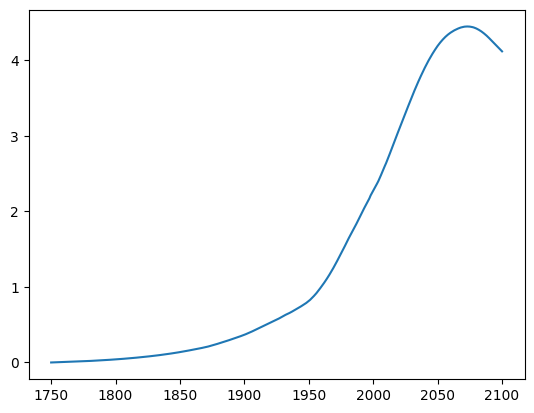

In [39]:
# Example plot
plt.plot(df['year'], df['atmospheric_temp'])

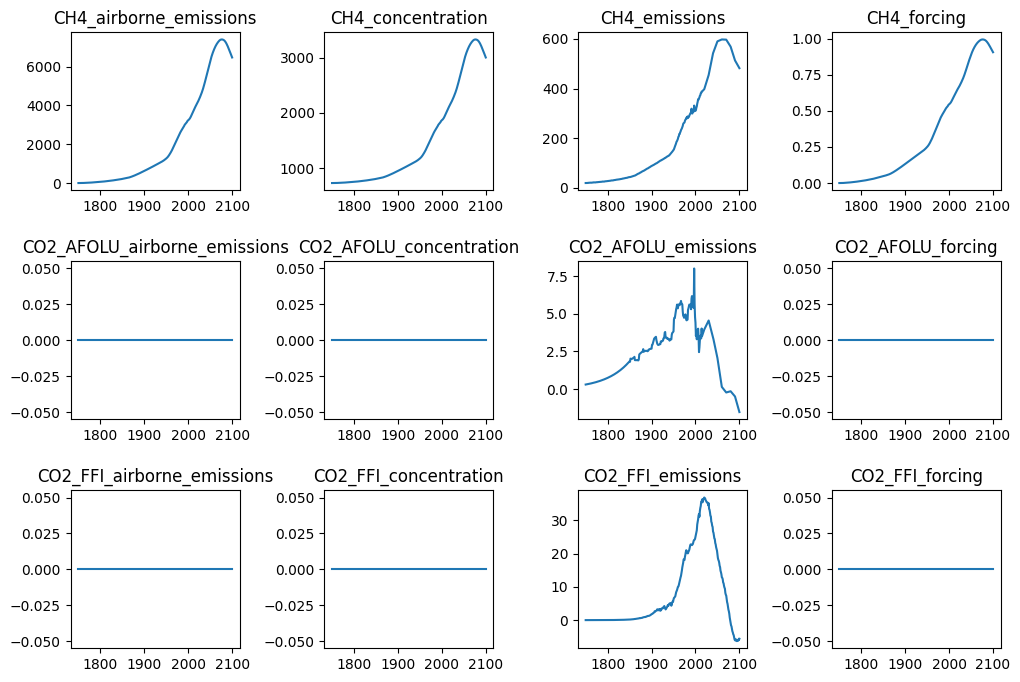

In [40]:
# Subplots of first 12 columns
m, n = 3, 4
fig, axs = plt.subplots(m, n, figsize=(12,8))
columns = df.columns.difference(['year', 'run']) # exclude 'year' column for plotting
for i in range(m):
    for j in range(n):
        ax = axs[i][j]
        column = columns[i * n + j]
        ax.set_title(column)
        ax.plot(df['year'], np.where(np.abs(df[column]) < 1.0e+307, df[column], np.NaN))

plt.subplots_adjust(wspace=0.5, hspace=0.45)
plt.show()

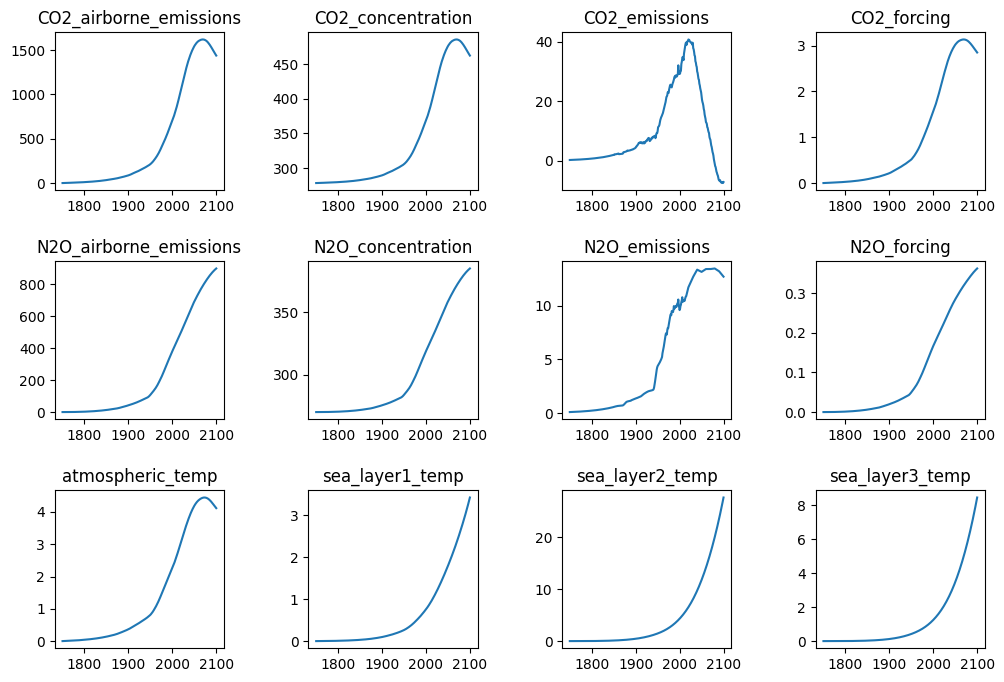

In [41]:
# Subplots of last 12 columns
m, n = 3, 4
fig, axs = plt.subplots(m, n, figsize=(12,8))
columns = df.columns.difference(['year', 'run']) # exclude 'year' column for plotting
for i in range(m):
    for j in range(n):
        ax = axs[i][j]
        column = columns[12 + i * n + j]
        ax.set_title(column)
        ax.plot(df['year'], np.where(np.abs(df[column]) < 1.0e+307, df[column], np.NaN))

plt.subplots_adjust(wspace=0.5, hspace=0.45)
plt.show()